dataset contains ~80 photos of old people downloaded from google images using "old person" request by https://github.com/Joeclinton1/google-images-download

I used first part of [DeepFaceLab](https://arxiv.org/pdf/2005.05535v4.pdf) pipeline for face segmentation. Pipeline consists of:
## 1. Face Detection:

[S3FD](https://arxiv.org/pdf/1708.05237.pdf) detector

## 2. Face Alignment:

heatmapbased facial landmark algorithm 2DFAN (for faces with normal posture) and PRNet with
3D face priori information (for face with large Euler angle (yaw, pitch, roll))

# 3. Face Segmentation:

XSeg model pretrained by the Author of DeepFaceLab

In [98]:
import os

import cv2 as cv

import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt

from tqdm import tqdm

In [136]:
def calculate_iou(labeled_img, predicted_img):
    intersection = np.logical_and(labeled_img, predicted_img)
    union = np.logical_or(labeled_img, predicted_img)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def show_probe_from_dataset(image_index):

    img = cv.imread(image_crop_paths[image_index])

    with open(mask_true_paths[image_index], "rb") as np_f:
        mask_true = np.load(np_f).astype('uint8')[:,:,0]

    with open(mask_pred_paths[image_index], "rb") as np_f:
        mask_pred = np.load(np_f).astype('uint8')

    labeled_masked_img = cv.bitwise_and(img,img,mask = mask_true)
    predicted_masked_img = cv.bitwise_and(img,img,mask = mask_pred)
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Image")

    plt.subplot(1,3,2)
    labeled_masked_img = cv.bitwise_and(img,img,mask = mask_true)
    plt.imshow(labeled_masked_img)
    plt.title("Labeled")

    plt.subplot(1,3,3)

    plt.imshow(predicted_masked_img)
    plt.title("Predicted")

    plt.show()
    print("IoU:", calculate_iou(labeled_masked_img, predicted_masked_img))

In [137]:
mask_true_paths = []
image_crop_paths = []

for filename in os.listdir(path='./workspace/data_src/aligned/'):
    if ".npy" in filename:
        mask_true_paths.append('./workspace/data_src/aligned/' + filename)
    elif ".jpg" in filename:
        image_crop_paths.append('./workspace/data_src/aligned/' + filename)
        
mask_true_paths.sort()
image_crop_paths.sort()

In [138]:
mask_pred_paths = []
for filename in os.listdir(path='./workspace/data_src/aligned_xseg/'):
    if ".npy" in filename:
        mask_pred_paths.append('./workspace/data_src/aligned_xseg/' + filename)
mask_pred_paths.sort()

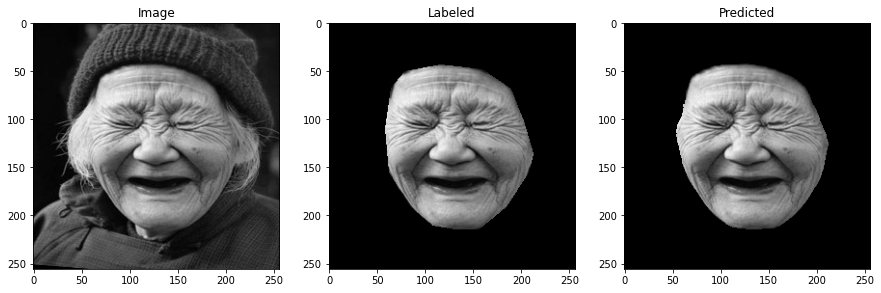

IoU: 0.9678242381289865


In [140]:
show_probe_from_dataset(image_index=0)

In [141]:
ious = []
for image_index in range(len(image_crop_paths)):
    img = cv.imread(image_crop_paths[image_index])

    with open(mask_true_paths[image_index], "rb") as np_f:
        mask_true = np.load(np_f).astype('uint8')[:,:,0]

    with open(mask_pred_paths[image_index], "rb") as np_f:
        mask_pred = np.load(np_f).astype('uint8')

    labeled_masked_img = cv.bitwise_and(img,img,mask = mask_true)
    predicted_masked_img = cv.bitwise_and(img,img,mask = mask_pred)
    
    ious.append(calculate_iou(labeled_masked_img, predicted_masked_img))

Mean IoU: 0.8868283942920183 +- 0.08219398037322817 std


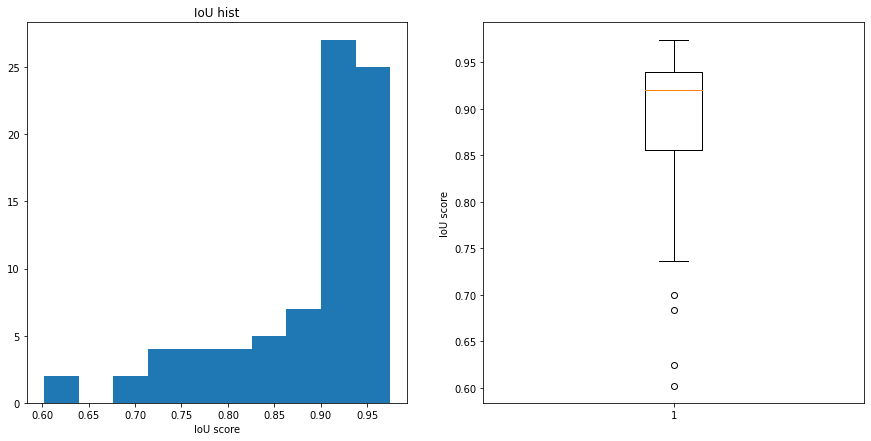

In [143]:
print(f"Mean IoU: {np.mean(ious)} +- {np.std(ious)} std")
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(sorted(ious))
plt.title("IoU hist")
plt.xlabel("IoU score")

plt.subplot(1,2,2)
plt.ylabel("IoU score")
plt.boxplot(ious)
plt.show()

In [144]:
np.array(ious).argsort()[:4]

array([60, 33, 63, 30])

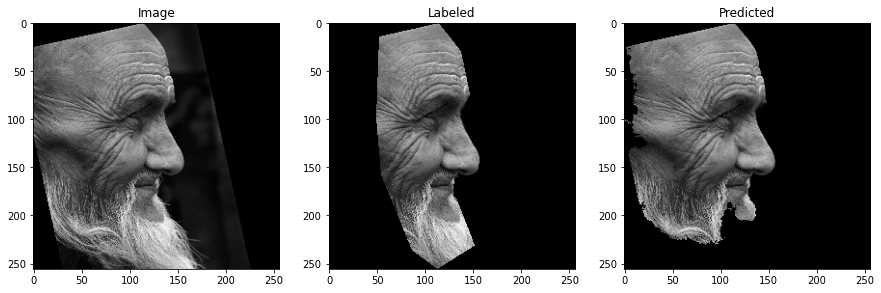

IoU: 0.6023530230777263


In [145]:
show_probe_from_dataset(image_index=60)

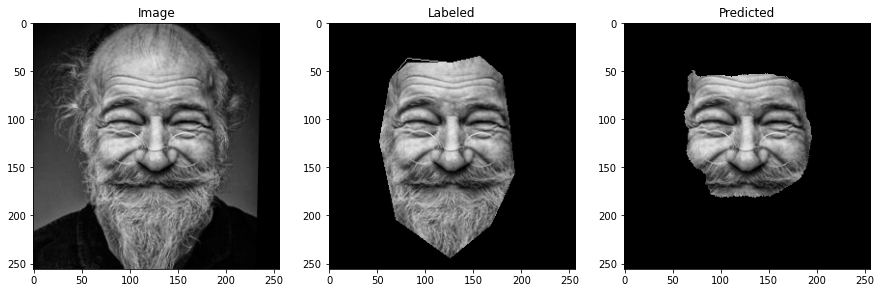

IoU: 0.6239598467837802


In [146]:
show_probe_from_dataset(image_index=33)

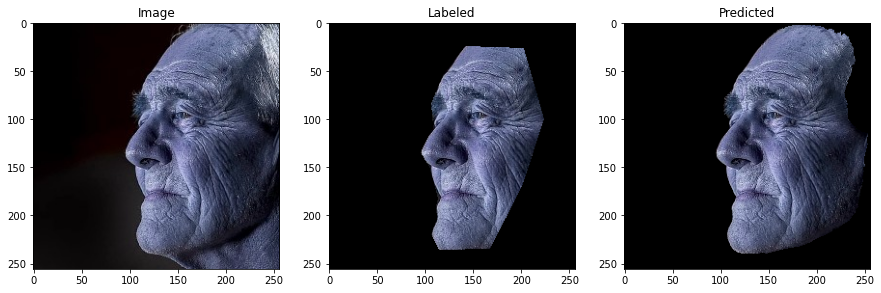

IoU: 0.6838672958808604


In [147]:
show_probe_from_dataset(image_index=63)

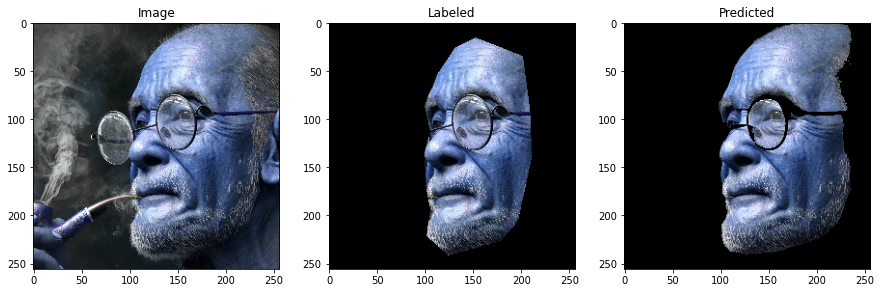

IoU: 0.6998126775031724


In [148]:
show_probe_from_dataset(image_index=30)